# NLP Course

Please see the [Hugging Face NLP Course page](https://huggingface.co/learn/nlp-course/chapter0/1?fw=pt).

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

## Summarization



Please see [Summarization](https://huggingface.co/learn/nlp-course/chapter7/5?fw=pt#summarization), 7. Main NLP Tasks, in the 🤗 NLP Course.

### Preparing a multilingual corpus

> Defunct: Dataset "amazon_reviews_multi" is defunct and no longer accessible due to the decision of data providers.

The following code will not work, since The Multilingual Amazon Reviews Corpus has been taken down from 🤗 Datasets.

In [2]:
from huggingface_hub import notebook_login

notebook_login()

In [3]:
from datasets import load_dataset

dataset_en = load_dataset("buruzaemon/amazon_reviews_multi", "en")
dataset_en

DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 200000
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
})

In [4]:
dataset_ja = load_dataset("buruzaemon/amazon_reviews_multi", "ja")
dataset_ja

DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 200000
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
})

In [5]:
def show_samples(dataset, num_samples=3, seed=42):
    sample = dataset["train"].shuffle(seed=seed).select(range(num_samples))
    for example in sample:
        print(f"\n'>> Title: {example['review_title']}'")
        print(f"'>> Review: {example['review_body']}'")

In [6]:
show_samples(dataset_en)


'>> Title: Worked in front position, not rear'
'>> Review: 3 stars because these are not rear brakes as stated in the item description. At least the mount adapter only worked on the front fork of the bike that I got it for.'

'>> Title: meh'
'>> Review: Does it’s job and it’s gorgeous but mine is falling apart, I had to basically put it together again with hot glue'

'>> Title: Can't beat these for the money'
'>> Review: Bought this for handling miscellaneous aircraft parts and hanger "stuff" that I needed to organize; it really fit the bill. The unit arrived quickly, was well packaged and arrived intact (always a good sign). There are five wall mounts-- three on the top and two on the bottom. I wanted to mount it on the wall, so all I had to do was to remove the top two layers of plastic drawers, as well as the bottom corner drawers, place it when I wanted and mark it; I then used some of the new plastic screw in wall anchors (the 50 pound variety) and it easily mounted to the wall. 

In [7]:
show_samples(dataset_ja)


'>> Title: デザインは良いが…。'
'>> Review: 綿棒に比べて思っていたほど耳垢は取れなかった、また音が大きい。'

'>> Title: 男性には、耳かけが短すぎる。'
'>> Review: マスク自体は、フィットして良いのですが、耳かけが、短すぎる。女性ならば、良いかも⁉あと気になる点は、ちょっと油？の臭いがします。'

'>> Title: 吸い込みパワーも申し分ない'
'>> Review: 吸引力はすごいです！たくさん埃が取れます。自宅用は現在キャニスタータイプを使用中ですがコードレスはやはり取り扱いが便利で楽です。'


<hr width=40%/>

In [8]:
dataset_en.set_format("pandas")
english_df = dataset_en["train"][:]

# Show counts for top 20 products for English reviews
english_df["product_category"].value_counts()[:20]

product_category
home                      17679
apparel                   15951
wireless                  15717
other                     13418
beauty                    12091
drugstore                 11730
kitchen                   10382
toy                        8745
sports                     8277
automotive                 7506
lawn_and_garden            7327
home_improvement           7136
pet_products               7082
digital_ebook_purchase     6749
pc                         6401
electronics                6186
office_product             5521
shoes                      5197
grocery                    4730
book                       3756
Name: count, dtype: int64

In [9]:
dataset_ja.set_format("pandas")
japanese_df = dataset_ja["train"][:]

# Show counts for top 20 products for Japanese reviews
japanese_df["product_category"].value_counts()[:20]

product_category
home                18662
wireless            16333
sports              15788
pc                  14892
kitchen             13356
automotive          13124
drugstore           10286
electronics          9867
shoes                8924
toy                  8605
beauty               8476
apparel              8166
home_improvement     6717
grocery              6409
other                5826
book                 5591
pet_products         4842
camera               4415
office_product       4257
video_games          2559
Name: count, dtype: int64

<hr width=40%/>

> ... To stick with the Amazon theme, though, let’s focus on summarizing book reviews ...

In [10]:
dataset_en.reset_format()
dataset_ja.reset_format()

In [11]:
def filter_books(example):
    return example["product_category"] in ("book", "digital_ebook_purchase")

In [12]:
english_books = dataset_en.filter(filter_books)

show_samples(english_books)


'>> Title: I'm dissapointed.'
'>> Review: I guess I had higher expectations for this book from the reviews. I really thought I'd at least like it. The plot idea was great. I loved Ash but, it just didnt go anywhere. Most of the book was about their radio show and talking to callers. I wanted the author to dig deeper so we could really get to know the characters. All we know about Grace is that she is attractive looking, Latino and is kind of a brat. I'm dissapointed.'

'>> Title: Good art, good price, poor design'
'>> Review: I had gotten the DC Vintage calendar the past two years, but it was on backorder forever this year and I saw they had shrunk the dimensions for no good reason. This one has good art choices but the design has the fold going through the picture, so it's less aesthetically pleasing, especially if you want to keep a picture to hang. For the price, a good calendar'

'>> Title: Helpful'
'>> Review: Nearly all the tips useful and. I consider myself an intermediate to a

In [13]:
japanese_books = dataset_ja.filter(filter_books)

show_samples(japanese_books)


'>> Title: おすすめできない'
'>> Review: ダンジョン飯を読んだときも同じ感想を抱いたのですが……。 はっきり言って、つまらない。読めば分かる。 ジャンルで言うと近いのは魔法陣グルグル。それを無駄にエロにシフトした感じ。 グルグルと根本的に違うのは、ストーリー性が全く無いこと。少なくとも１巻時点では何もありません。ヒロインが戦うたびに馬鹿やってエロいことになる。 → パーティーが混乱する。→ メンバーが１人増える。 → 戦いに出たらまたヒロインが馬鹿やってエロいことに……。 それを何度も繰り返す。 『 面 白 い わ け が な い 』 私は思うのですが、ギャグとエロはあまり相性が良くない。笑わせたいのか、エロを見せていきたいのか、どっちなんだ？ 水と油を無理やり混ぜようとしたみたいに、漫画として未完成なうえに見せたいストーリーすらない。これで背景にきちっとしたストーリーがあるならエロも活きるが、日々適当に戦って、適当にエロいことが起きて、適当な仲間だけが増えていく……。ただそれだけの物語。 ぶっちゃけ、つまらないです……。というより、何を見せたいのかよく分からないとしか言いようがない。 ギャグは笑えず、おっぱい見せとけば良いだろう的な、全く無意味なエロ。所帯を増やしてそれを繰り返していくだけの漫画です。絶対におすすめできない。'

'>> Title: 即戦力ブランド本'
'>> Review: タイトルが刺激的。これが「ジャパンプレミアムブランド」とかだと重版には至らなかっただろう。それは、氏が自ら広告に携わる現場のマーケッターであったがゆえ、タイトルのうまさももちろん、内容もこの部分が良く反映されている。つまり、プレミアムブランドの分析を、しっかりと企業の利益に落とし込む事を絡めながら、なぜ日本でプレミアムブランドが育ちにくいかという本質に迫っている。コミュニケーションを生業とする人間から見た、日本の製造業の人々、特に経営に携わる企業トップの人々への、愛を込めた大きな提言なのではないかと感じた。'

'>> Title: プライスアクションの概要がつかめる'
'>> Review: プライスアクションに関する本がそれほど多くない中、 本書は原版的な知sh気を得る上では役に立つ。 ただ、実践面でのより詳しい説明が欲しいところである。'


<hr width=40%/>

>  one final thing to check is the distribution of words in the reviews and their titles. This is especially important for summarization tasks, where short reference summaries in the data can bias the model to only output one or two words in the generated summaries. The plots below show the word distributions, and we can see that the titles are heavily skewed toward just 1-2 word

In [14]:
def en_word_count(example):
    title_char_count = len(example['review_title'].strip().split())
    review_char_count = len(example['review_body'].strip().split())
    return {
        "title_count": title_char_count, 
        "review_count": review_char_count
    }

english_books = english_books.map(en_word_count)

In [15]:
english_books.set_format("pandas")
english_df = english_books["train"][:]

en_title_word_counts = english_df.value_counts("title_count")
en_title_word_counts = sorted(en_title_word_counts.to_dict().items())

en_title_num_words, en_title_counts = [], []

for (n,c) in en_title_word_counts:
    en_title_num_words.append(n)
    en_title_counts.append(c)

# -------

en_review_word_counts = english_df.value_counts("review_count")
en_review_word_counts = sorted(en_review_word_counts.to_dict().items())

en_review_num_words, en_review_counts = [], []

for (n,c) in en_review_word_counts:
    en_review_num_words.append(n)
    en_review_counts.append(c)

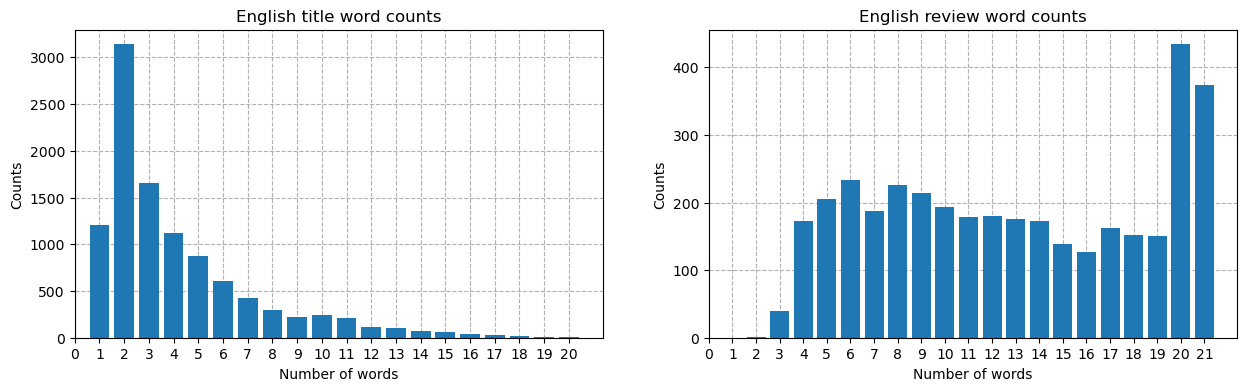

In [16]:
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))

ax1.grid(linestyle='--')
ax1.bar(en_title_num_words[:20], en_title_counts[:20], zorder=2)
ax1.set_xlabel('Number of words')
ax1.set_ylabel('Counts')
ax1.set_xticks(list(range(en_title_num_words[:20][-1]+1)))
ax1.set_xlim(left=0)
ax1.set_title('English title word counts')

ax2.grid(linestyle='--')
ax2.bar(en_review_num_words[:20], en_review_counts[:20], zorder=2)
ax2.set_xlabel('Number of words')
ax2.set_ylabel('Counts')
ax2.set_xticks(list(range(0, en_review_num_words[:20][-1]+1)))
ax2.set_xlim(left=0)
ax2.set_title('English review word counts')

plt.show()

<hr width=40%/>

In [17]:
def ja_char_count(example):
    title_char_count = len(example['review_title'].strip())
    review_char_count = len(example['review_body'].strip())
    return {
        "title_count": title_char_count, 
        "review_count": review_char_count
    }

japanese_books = japanese_books.map(ja_char_count)

In [18]:
japanese_books.set_format("pandas")
japanese_df = japanese_books["train"][:]

ja_title_char_counts = japanese_df.value_counts("title_count")
ja_title_char_counts = sorted(ja_title_char_counts.to_dict().items())

ja_title_num_chars, ja_title_counts = [], []

for (n,c) in ja_title_char_counts:
    ja_title_num_chars.append(n)
    ja_title_counts.append(c)

# -------

ja_review_char_counts = japanese_df.value_counts("review_count")
ja_review_char_counts = sorted(ja_review_char_counts.to_dict().items())

ja_review_num_chars, ja_review_counts = [], []

for (n,c) in ja_review_char_counts:
    ja_review_num_chars.append(n)
    ja_review_counts.append(c)

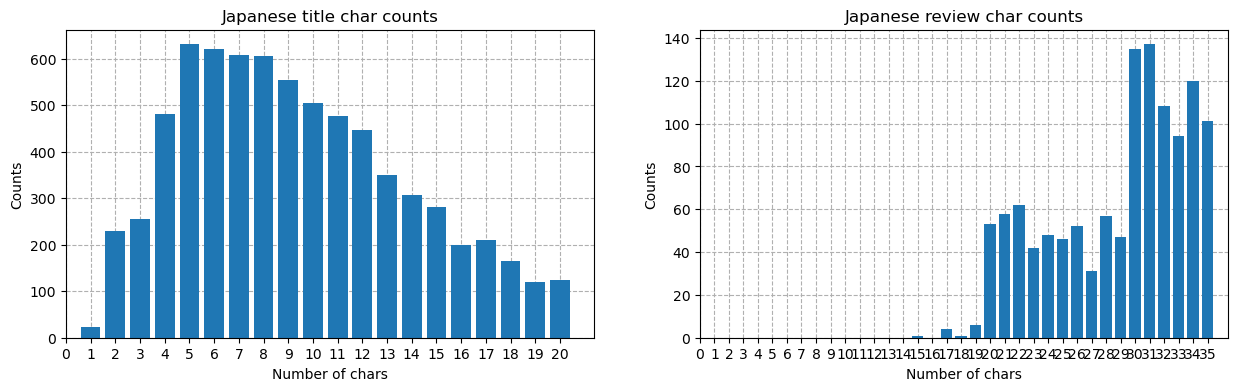

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))

ax1.grid(linestyle='--')
ax1.bar(ja_title_num_chars[:20], ja_title_counts[:20], zorder=2)
ax1.set_xlabel('Number of chars')
ax1.set_ylabel('Counts')
ax1.set_xticks(list(range(ja_title_num_chars[:20][-1]+1)))
ax1.set_xlim(left=0)
ax1.set_title('Japanese title char counts')

ax2.grid(linestyle='--')
ax2.bar(ja_review_num_chars[:20], ja_review_counts[:20], zorder=2)
ax2.set_xlabel('Number of chars')
ax2.set_ylabel('Counts')
ax2.set_xticks(list(range(0, ja_review_num_chars[:20][-1]+1)))
ax2.set_xlim(left=0)
ax2.set_title('Japanese review char counts')

plt.show()

<hr width=40%/>

In [20]:
english_books.reset_format()

english_books = english_books.filter(lambda x: len(x["review_title"].split()) > 2)
english_books

DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category', 'title_count', 'review_count'],
        num_rows: 6162
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category', 'title_count', 'review_count'],
        num_rows: 135
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category', 'title_count', 'review_count'],
        num_rows: 164
    })
})

In [21]:
japanese_books.reset_format()

japanese_books = japanese_books.filter(lambda x: len(x["review_title"]) > 2)
japanese_books

DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category', 'title_count', 'review_count'],
        num_rows: 7555
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category', 'title_count', 'review_count'],
        num_rows: 160
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category', 'title_count', 'review_count'],
        num_rows: 178
    })
})

<hr width=40%/>

> Before we look at various models that are suitable for this task, we have one last bit of data preparation to do: combining the English and (Japanese) reviews as a single `DatasetDict` object. 🤗 Datasets provides a handy [`concatenate_datasets()`](https://huggingface.co/docs/datasets/v3.4.1/en/package_reference/main_classes#datasets.concatenate_datasets) function that (as the name suggests) will stack two `Dataset` objects on top of each other. So, to create our bilingual dataset, we’ll loop over each split, concatenate the datasets for that split, and shuffle the result to ensure our model doesn’t overfit to a single language

In [22]:
from datasets import concatenate_datasets, DatasetDict

en_ja_books_dataset = DatasetDict()

for split in english_books.keys():
    en_ja_books_dataset[split] = concatenate_datasets([
        english_books[split], japanese_books[split]
    ])
    en_ja_books_dataset[split] = en_ja_books_dataset[split].shuffle(seed=777)

In [23]:
en_ja_books_dataset

DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category', 'title_count', 'review_count'],
        num_rows: 13717
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category', 'title_count', 'review_count'],
        num_rows: 295
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category', 'title_count', 'review_count'],
        num_rows: 342
    })
})

In [24]:
# Peek at a few examples
show_samples(en_ja_books_dataset, num_samples=8)


'>> Title: Another special read by this author'
'>> Review: Unique storyline . A good tale with characters you like and that all important HEA. Wondering what happened to that email to Clay, though.'

'>> Title: One book NOT 24 volumes.'
'>> Review: If I could I would leave no stars. The description says 24 volumes but the seller only sells one book. The seller is deceitful and crooked. If I could I would ask for a refund based on fraud.'

'>> Title: 最悪でした'
'>> Review: サインと前の持ち主の名前が書いてありました。新品じゃないじゃん…'

'>> Title: エンジニアはもちろん、IT企業にいる人に読んで欲しいです'
'>> Review: 現場にいるとおもしろいくらいに本の中に書いてある問題が続々と起こります。これ読んでなかったら今頃悩み続けていたと思います。'

'>> Title: つまらない'
'>> Review: つまらない内容で、途中で読むのを止めました。'

'>> Title: No Right To Kill review'
'>> Review: Very good read. A real page turner. I like Sara Ramsey. I wish her luck with the vet. It seems he's lit a spark. The cat thing is scared.'

'>> Title: Delivered on time and in great shape'
'>> Review: A great finish to the story of the Defenders of Shannara'

'>> Title:

#### Models for text summarization

> ... We'll focus on mT5, an interesting architecture based on T5 that was pretrained in a text-to-text framework. In T5, every NLP task is formulated in terms of a prompt prefix like summarize: which conditions the model to adapt the generated text to the prompt. As shown in the figure below, this makes T5 extremely versatile, as you can solve many tasks with a single model!

Refer to [MT5 Release](https://huggingface.co/collections/google/mt5-release-65005f1a520f8d7b4d039509) on Google's Collections page at 🤗.

> In T5, every NLP task is formulated in terms of a prompt prefix like summarize: which conditions the model to adapt the generated text to the prompt...<p/>
> mT5 doesn’t use prefixes, but shares much of the versatility of T5 and has the advantage of being multilingual

In [25]:
from transformers import AutoTokenizer

model_checkpoint = "google/mt5-small"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/opt/conda/envs/learn-hf/lib/python3.9/site-packages/transformers/convert_slow_tokenizer.py:561: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [26]:
inputs = tokenizer("I loved reading the Hunger Games!")
inputs

{'input_ids': [336, 259, 28387, 11807, 287, 62893, 295, 12507, 309, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [27]:
tokenizer.convert_ids_to_tokens(inputs.input_ids)

['▁I', '▁', 'loved', '▁reading', '▁the', '▁Hung', 'er', '▁Games', '!', '</s>']

In [28]:
tokenizer.vocab_size

250100

> To tokenize our corpus, we have to deal with a subtlety associated with summarization: because our labels are also text, it is possible that they exceed the model’s maximum context size. This means we need to apply truncation to both the reviews and their titles to ensure we don’t pass excessively long inputs to our model. <p/>
> ... define values for max_input_length and max_target_length, which set the upper limits for how long our reviews and titles can be. Since the review body is typically much larger than the title, we’ve scaled these values accordingly ...

In [29]:
max_input_length = 512        # max num tokens for input (review body)
max_target_length = 30        # max num tokens for labels (review title)


def preprocess_function(examples):
    model_inputs = tokenizer(
        examples["review_body"],
        max_length=max_input_length,
        truncation=True,
    )
    labels = tokenizer(
        examples["review_title"], max_length=max_target_length, truncation=True
    )
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [30]:
tokenized_datasets = en_ja_books_dataset.map(
    preprocess_function, 
    batched=True
)
tokenized_datasets

Map:   0%|          | 0/342 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category', 'title_count', 'review_count', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 13717
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category', 'title_count', 'review_count', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 295
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category', 'title_count', 'review_count', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 342
    })
})

#### Metrics for text summarization

Please see the Wikipedia page for [ROUGE (metric)](https://en.wikipedia.org/wiki/ROUGE_(metric))

In [31]:
generated_summary = "I absolutely loved reading the Hunger Games"
reference_summary = "I loved reading the Hunger Games"

In [32]:
import evaluate

rouge_score = evaluate.load("rouge")

In [33]:
scores = rouge_score.compute(
    predictions=[generated_summary], 
    references=[reference_summary]
)
scores

{'rouge1': 0.923076923076923,
 'rouge2': 0.7272727272727272,
 'rougeL': 0.923076923076923,
 'rougeLsum': 0.923076923076923}

In [34]:
import spacy

nlp_en = spacy.load("en_core_web_sm")
nlp_ja = spacy.load("ja_core_news_sm")

def three_sentence_summary(example):
    nlp = nlp_en
    if example["language"] == "ja":
        nlp = nlp_ja
    text = example["review_body"]
    doc = nlp(text)
    sents = [str(sp) for sp in doc.sents]
    return "\n".join(sents[:3])

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [35]:
print(three_sentence_summary(en_ja_books_dataset["test"][0]))

前回の黒いドレッサーバッグの評判がよかったため、予約して購入しました。
ガッカリです。
ヨレヨレなのは仕方ないと思えます。


In [36]:
def evaluate_baseline(dataset, metric):
    summaries = [three_sentence_summary(ex) for ex in dataset]
    return metric.compute(predictions=summaries, references=dataset["review_title"])

In [37]:
import pandas as pd

score = evaluate_baseline(en_ja_books_dataset["validation"], rouge_score)
score
#rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]
#rouge_dict = dict((rn, round(score[rn].mid.fmeasure * 100, 2)) for rn in rouge_names)
#rouge_dict

{'rouge1': 0.07996464960773085,
 'rouge2': 0.03859659738550497,
 'rougeL': 0.07553269887435811,
 'rougeLsum': 0.07792319701673944}

#### Fine-tuning mT5 with the Trainer API

In [38]:
from transformers import AutoModelForSeq2SeqLM

model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)

In [39]:
from huggingface_hub import notebook_login

notebook_login()

In [40]:
from transformers import Seq2SeqTrainingArguments

batch_size = 8
num_train_epochs = 2
# Show the training loss with every epoch
logging_steps = len(tokenized_datasets["train"]) // batch_size
model_name = model_checkpoint.split("/")[-1]

args = Seq2SeqTrainingArguments(
    output_dir=f"{model_name}-finetuned-amazon-en-ja",
    eval_strategy="epoch",
    learning_rate=5.6e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=num_train_epochs,
    predict_with_generate=True,
    logging_steps=logging_steps,
    push_to_hub=True,
)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [41]:
import numpy as np


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    # Decode generated summaries into text
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    # Replace -100 in the labels as we can't decode them
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    # Decode reference summaries into text
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    # ROUGE expects a newline after each sentence
    decoded_preds = ["\n".join(sent_tokenize(pred.strip())) for pred in decoded_preds]
    decoded_labels = ["\n".join(sent_tokenize(label.strip())) for label in decoded_labels]
    # Compute ROUGE scores
    result = rouge_score.compute(
        predictions=decoded_preds, references=decoded_labels, use_stemmer=True
    )
    # Extract the median scores
    #result = {key: value.mid.fmeasure * 100 for key, value in result.items()}
    return {k: round(v, 4) for k, v in result.items()}

In [42]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [43]:
tokenized_datasets = tokenized_datasets.remove_columns(
    en_ja_books_dataset["train"].column_names
)

In [44]:
features = [tokenized_datasets["train"][i] for i in range(2)]
data_collator(features)

{'input_ids': tensor([[  1494,  12614,   1689,    263,    259,  76224,    484,  48461,    265,
            514,    259,   3151,   3435,    260,   7483,   7779,    336,    259,
           2220,  22677,  11807,   1537,   5425,    304,   2486,    260,    431,
            260,      1,      0,      0,      0,      0,      0],
        [   336,   9070,    345,    259, 108306,    304,   3199,    263,    260,
           1385,    639,    287,   2262,   1459,    336,   4906,    259,  20882,
            455,  12605,  51455,    261,    336,    269,  25640,  84005,    288,
           4906,   1097,    304,   1001,   2404,    260,      1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), 'labels': tensor([[   259,    277,   9248,    932,  18072,    288,   7732,  58415,   4836,
             

In [45]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    model,
    args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    processing_class=tokenizer,
    compute_metrics=compute_metrics,
)

In [46]:
%%time

trainer.train()

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch,Training Loss,Validation Loss


OverflowError: out of range integral type conversion attempted

> ✏️ Try it out! Once you’ve worked through this section, see how well mT5 compares to mBART by fine-tuning the latter with the same techniques. For bonus points, you can also try fine-tuning T5 on just the English reviews. Since T5 has a special prefix prompt, you’ll need to prepend summarize: to the input examples in the preprocessing steps below.